Fichier chargé avec succès.
Fréquence d’échantillonnage : 1000.0 Hz
Nombre total de canaux : 343

🔹 10 événements détectés.
Valeurs de triggers uniques : [    3     4     8     9   256   512 16384]

 Tableau récapitulatif des événements :


/tmp/ipykernel_8026/237716232.py:11: RuntimeWarning: This filename (/home/neurostim/test/MEG_USBio/fif/test_meg_client.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(FILE_FIF, allow_maxshield=True, preload=False, verbose=False)
/tmp/ipykernel_8026/237716232.py:11: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne.io.read_raw_fif(FILE_FIF, allow_maxshield=True, preload=False, verbose=False)


,Time (s),Trigger value,Binary mask,STI001,STI002,STI003,STI004,STI005,STI006,STI007,STI008,STI009,STI010,STI011,STI012,STI013,STI014,STI015,STI016
0,46.267,9,0000000000001001,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,51.276,4,0000000000000100,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,56.284,3,0000000000000011,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,66.300,8,0000000000001000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,78.079,512,0000001000000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,80.524,256,0000000100000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,82.388,16384,0100000000000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,89.234,512,0000001000000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,91.093,256,0000000100000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,93.082,16384,0100000000000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


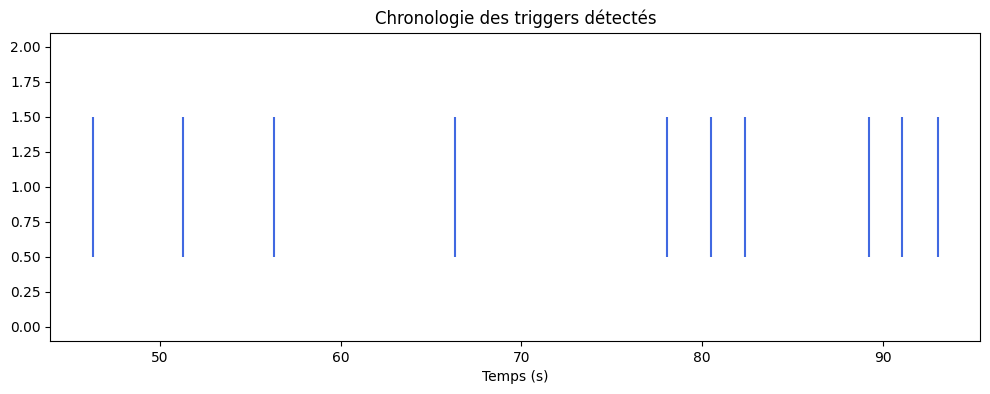

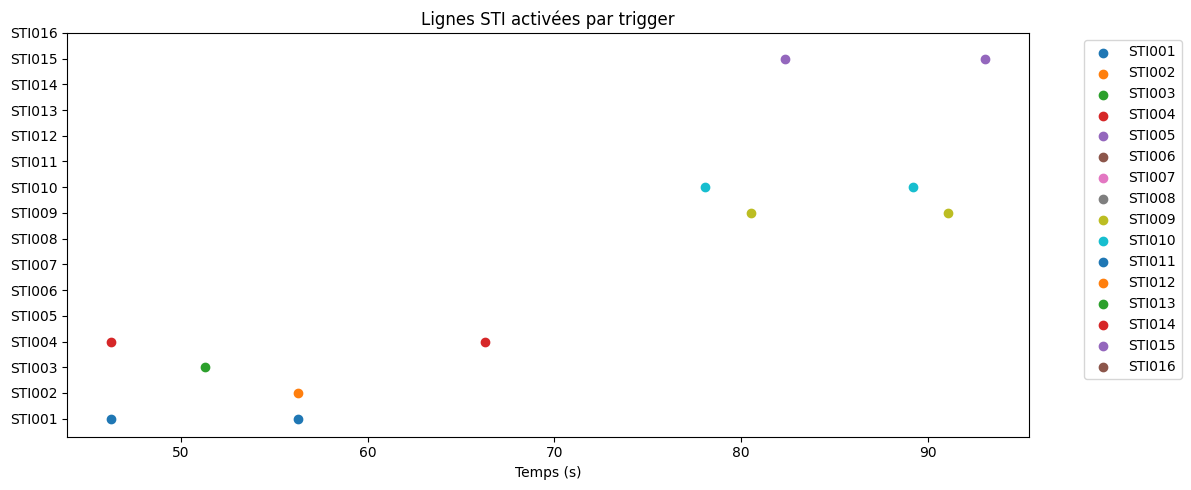

In [1]:
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Paramètres ---
FILE_FIF = "/home/neurostim/test/MEG_USBio/fif/test_meg_client.fif"  # chemin du fichier à analyser
STI_CHANNELS = [f"STI{str(i).zfill(3)}" for i in range(1, 17)] + ["STI101"]

# --- Lecture du fichier ---
raw = mne.io.read_raw_fif(FILE_FIF, allow_maxshield=True, preload=False, verbose=False)
print("Fichier chargé avec succès.")
print(f"Fréquence d’échantillonnage : {raw.info['sfreq']} Hz")
print(f"Nombre total de canaux : {len(raw.ch_names)}")

# --- Recherche d'événements ---
events = mne.find_events(raw, stim_channel=None, verbose=False)
print(f"\n🔹 {len(events)} événements détectés.")
unique_triggers = np.unique(events[:, 2])
print("Valeurs de triggers uniques :", unique_triggers)

# --- Conversion en DataFrame lisible ---
sfreq = raw.info["sfreq"]
event_times = events[:, 0] / sfreq  # en secondes
event_values = events[:, 2]

df = pd.DataFrame({
    "Time (s)": event_times,
    "Trigger value": event_values,
    "Binary mask": [format(v, "016b") for v in event_values]
})

# Décodage des bits (STI001 = bit0 → STI016 = bit15)
for i in range(16):
    df[f"STI{str(i+1).zfill(3)}"] = df["Trigger value"].apply(lambda x: (x >> i) & 1)

# --- Affichage tableau ---
print("\n Tableau récapitulatif des événements :")
display(df)

# --- Tracé rapide ---
plt.figure(figsize=(12, 4))
plt.eventplot(df["Time (s)"], colors="royalblue")
plt.xlabel("Temps (s)")
plt.title("Chronologie des triggers détectés")
plt.show()

# --- Tracé des lignes activées ---
fig, ax = plt.subplots(figsize=(12, 5))
for i in range(16):
    y = i * np.ones_like(df["Time (s)"])
    mask = df[f"STI{str(i+1).zfill(3)}"] == 1
    ax.scatter(df.loc[mask, "Time (s)"], y[mask], label=f"STI{str(i+1).zfill(3)}")

ax.set_yticks(range(16))
ax.set_yticklabels([f"STI{str(i+1).zfill(3)}" for i in range(16)])
ax.set_xlabel("Temps (s)")
ax.set_title("Lignes STI activées par trigger")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
